<a href="https://colab.research.google.com/github/HGOYALMQF27/Portfolio-Optimization/blob/main/Optimization3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import plotly.express as px
from pandas_datareader import data
from pulp import *
from datetime import date
from dateutil.relativedelta import relativedelta
from pypfopt import expected_returns
from pypfopt import risk_models
from pypfopt import EfficientFrontier
from pypfopt import plotting
import copy

In [ ]:
tickers = ['AAPL', 'AXP', 'MSFT', 'KO', 'JPM', 'UNH', 'PG', 'WMT', 'HD', 'V', 'INTC'] #change tickers here for portfolio of different weeks

In [ ]:
start_date = '2018/02/10' #modify the dates for 5 year rolling period
end_date = '2023/02/10' #modify the dates for 5 year rolling period
#end_date = datetime.today().strftime('%Y-%m-%d')
df_prices = pd.DataFrame()

In [ ]:
def datafromYahoo(dataframe,ticker_list,start,finish):
    for i in ticker_list:
        current_ticker = yf.Ticker(i)
        dataframe[i] = (current_ticker.history(period='5y')[['Close']])
    return dataframe
df = datafromYahoo(df_prices,tickers,start_date,end_date)
df.head

<bound method NDFrame.head of                                  AAPL         AXP        MSFT         KO  \
Date                                                                       
2018-04-16 00:00:00-04:00   41.903236   87.178429   88.875267  38.154102   
2018-04-17 00:00:00-04:00   42.479984   87.420555   90.668449  38.324890   
2018-04-18 00:00:00-04:00   42.384655   88.622055   91.017624  38.008938   
2018-04-19 00:00:00-04:00   41.183475   95.346718   90.706192  37.838139   
2018-04-20 00:00:00-04:00   39.496090   93.875122   89.658585  37.351395   
...                               ...         ...         ...        ...   
2023-04-10 00:00:00-04:00  162.029999  161.139999  289.390015  62.689999   
2023-04-11 00:00:00-04:00  160.800003  161.830002  282.829987  62.580002   
2023-04-12 00:00:00-04:00  160.100006  159.289993  283.489990  62.689999   
2023-04-13 00:00:00-04:00  165.559998  162.300003  289.839996  63.150002   
2023-04-14 00:00:00-04:00  165.210007  163.220001  286.140

In [ ]:
df


,AAPL,AXP,MSFT,KO,JPM,UNH,PG,WMT,HD,V,INTC
Date,,,,,,,,,,,
2018-04-16 00:00:00-04:00,41.903236,87.178429,88.875267,38.154102,94.871185,214.014389,68.696861,79.398781,154.769089,117.917618,45.375801
2018-04-17 00:00:00-04:00,42.479984,87.420555,90.668449,38.324890,94.871185,221.661743,68.539543,80.367973,155.194962,119.775177,46.362988
2018-04-18 00:00:00-04:00,42.384655,88.622055,91.017624,38.008938,94.105049,219.663895,68.338547,80.066269,159.578171,120.433098,46.423599
2018-04-19 00:00:00-04:00,41.183475,95.346718,90.706192,37.838139,96.171036,219.069260,66.104492,80.358826,157.120346,119.930000,45.219933
2018-04-20 00:00:00-04:00,39.496090,93.875122,89.658585,37.351395,95.955826,218.418793,65.090210,79.526802,157.058258,120.162178,44.622421
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,162.029999,161.139999,289.390015,62.689999,127.889999,515.179993,150.960007,150.509995,291.170013,226.429993,32.520000
2023-04-11 00:00:00-04:00,160.800003,161.830002,282.829987,62.580002,128.520004,520.969971,150.660004,150.070007,293.769989,228.449997,32.349998
2023-04-12 00:00:00-04:00,160.100006,159.289993,283.489990,62.689999,128.500000,521.190002,151.070007,149.339996,290.440002,227.809998,32.020000


In [ ]:
# individual stock prices plot
fig_price = px.line(df, title='Line Chart of Stocks in the Portfolio')
fig_price.show()

In [ ]:
returns_portfolio = df.pct_change().dropna()
returns_portfolio.head()


,AAPL,AXP,MSFT,KO,JPM,UNH,PG,WMT,HD,V,INTC
Date,,,,,,,,,,,
2018-04-17 00:00:00-04:00,0.013764,0.002777,0.020176,0.004476,0.000000,0.035733,-0.002290,0.012207,0.002752,0.015753,0.021756
2018-04-18 00:00:00-04:00,-0.002244,0.013744,0.003851,-0.008244,-0.008076,-0.009013,-0.002933,-0.003754,0.028243,0.005493,0.001307
2018-04-19 00:00:00-04:00,-0.028340,0.075880,-0.003422,-0.004494,0.021954,-0.002707,-0.032691,0.003654,-0.015402,-0.004177,-0.025928
2018-04-20 00:00:00-04:00,-0.040972,-0.015434,-0.011549,-0.012864,-0.002238,-0.002969,-0.015344,-0.010354,-0.000395,0.001936,-0.013213
2018-04-23 00:00:00-04:00,-0.002896,-0.001786,0.003684,0.005487,-0.004844,-0.003063,-0.010840,-0.010117,0.003672,0.002094,-0.008345


In [ ]:
returns = px.line(returns_portfolio,title ='Returns')
returns.show()

In [ ]:
weight_portfolio = [0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909,0.0909] #change the weights based on number of stocks in the portfolio.
portfolio_return = df.dot(weight_portfolio)
portfolio_return.head()

Date
2018-04-16 00:00:00-04:00    93.731968
2018-04-17 00:00:00-04:00    95.051171
2018-04-18 00:00:00-04:00    95.321549
2018-04-19 00:00:00-04:00    95.358501
2018-04-20 00:00:00-04:00    94.646505
dtype: float64

In [ ]:
corr_df = df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()

In [ ]:
variance_matrix = returns_portfolio.cov()*252
variance_matrix

,AAPL,AXP,MSFT,KO,JPM,UNH,PG,WMT,HD,V,INTC
AAPL,0.111635,0.060215,0.078987,0.029983,0.049286,0.047134,0.031095,0.029017,0.055484,0.061205,0.074371
AXP,0.060215,0.143073,0.058235,0.044164,0.095894,0.056265,0.029940,0.020395,0.056669,0.078437,0.065527
MSFT,0.078987,0.058235,0.095569,0.030054,0.046769,0.048052,0.031998,0.029146,0.056136,0.061382,0.073173
KO,0.029983,0.044164,0.030054,0.046088,0.036921,0.030883,0.030023,0.019036,0.030506,0.033973,0.031484
JPM,0.049286,0.095894,0.046769,0.036921,0.103867,0.046689,0.026955,0.020286,0.049090,0.057667,0.058177
UNH,0.047134,0.056265,0.048052,0.030883,0.046689,0.087720,0.030069,0.023584,0.043462,0.046097,0.045944
PG,0.031095,0.029940,0.031998,0.030023,0.026955,0.030069,0.047236,0.025657,0.030265,0.028385,0.031909
WMT,0.029017,0.020395,0.029146,0.019036,0.020286,0.023584,0.025657,0.051880,0.028187,0.020550,0.029354
HD,0.055484,0.056669,0.056136,0.030506,0.049090,0.043462,0.030265,0.028187,0.082484,0.049153,0.056524
V,0.061205,0.078437,0.061382,0.033973,0.057667,0.046097,0.028385,0.020550,0.049153,0.084686,0.057246


In [ ]:
portfolio_variance = np.transpose(weight_portfolio)@variance_matrix@weight_portfolio
portfolio_volatility = np.sqrt(portfolio_variance)
print("Portfolio Variance:",portfolio_variance)
print("Portfolio Volatility:",portfolio_volatility)

Portfolio Variance: 0.04818046277580705
Portfolio Volatility: 0.21950048468239666


In [ ]:
port_returns = []
port_volatility = []
port_weights = []
num_assets = len(df.columns)
num_portfolios = 1000
individual_rets = df.resample('Y').last().pct_change().mean()

In [ ]:
for port in range(num_portfolios):
  # Randomly generate weight combination
  weights = np.random.random(num_assets)
  weights = weights/np.sum(weights)
  port_weights.append(weights)

  returns = np.dot(weights, individual_rets)
  port_returns.append(returns)

  # Computing portfolio variance
  var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
  sd = np.sqrt(var)
  ann_sd = sd*np.sqrt(250)
  port_volatility.append(ann_sd)

In [ ]:
data = {'Returns':port_returns, 'Volatility':port_volatility}
for counter,symbol in enumerate(df.columns.tolist()):
  data[symbol+' weight'] = [w[counter] for w in port_weights]

In [ ]:
portfolios_V1 = pd.DataFrame(data)
portfolios_V1.head()

,Returns,Volatility,AAPL weight,AXP weight,MSFT weight,KO weight,JPM weight,UNH weight,PG weight,WMT weight,HD weight,V weight,INTC weight
0,0.172052,3.557779,0.034605,0.146735,0.156858,0.114067,0.085163,0.120434,0.094907,0.033440,0.108126,0.096357,0.009308
1,0.156663,3.386524,0.014453,0.156336,0.097362,0.069445,0.138790,0.188644,0.164569,0.124449,0.026687,0.004073,0.015192
2,0.152008,3.565547,0.100537,0.117443,0.072694,0.084222,0.149475,0.011108,0.130098,0.091016,0.004999,0.110807,0.127602
3,0.134238,3.891821,0.018785,0.196979,0.046855,0.051294,0.161533,0.089446,0.040177,0.045267,0.045586,0.186507,0.117572
4,0.175679,3.498049,0.122802,0.137453,0.117247,0.045683,0.059547,0.096445,0.139315,0.118425,0.035726,0.024481,0.102875


Text(0, 0.5, 'Expected Returns')

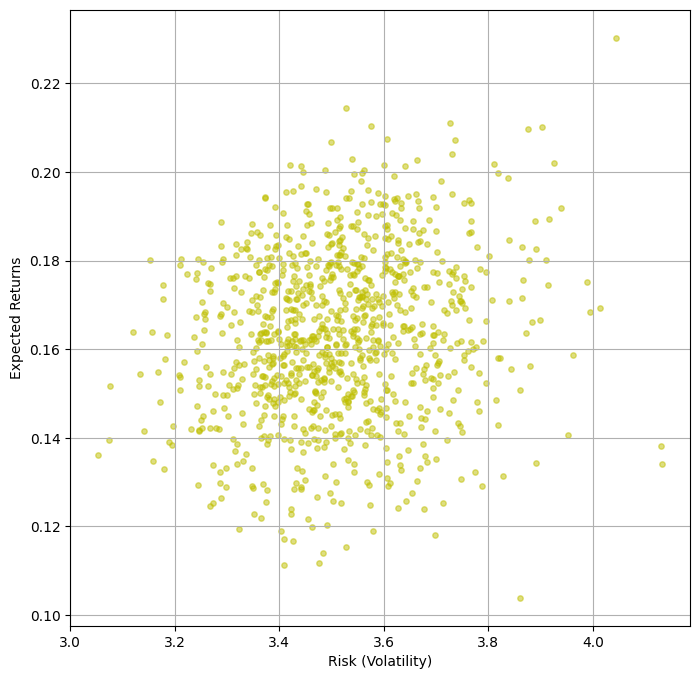

In [ ]:
# Plot efficient frontier
portfolios_V1.plot.scatter(x='Volatility', y='Returns', marker='o', color='y',s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")

In [ ]:
# Minimum volatility
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
min_vol_port

Returns        0.136059
Volatility     3.053826
AAPL weight    0.038748
AXP weight     0.000525
MSFT weight    0.033064
KO weight      0.108314
JPM weight     0.243639
UNH weight     0.022939
PG weight      0.251968
WMT weight     0.241793
HD weight      0.005907
V weight       0.010418
INTC weight    0.042686
Name: 410, dtype: float64

In [ ]:
# Finding the optimal portfolio
rf = 0.01
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

Returns        0.214489
Volatility     3.527480
AAPL weight    0.209536
AXP weight     0.083887
MSFT weight    0.150345
KO weight      0.130865
JPM weight     0.018390
UNH weight     0.106958
PG weight      0.122911
WMT weight     0.036269
HD weight      0.080753
V weight       0.028952
INTC weight    0.031134
Name: 123, dtype: float64

Text(0, 0.5, 'Expected Returns')

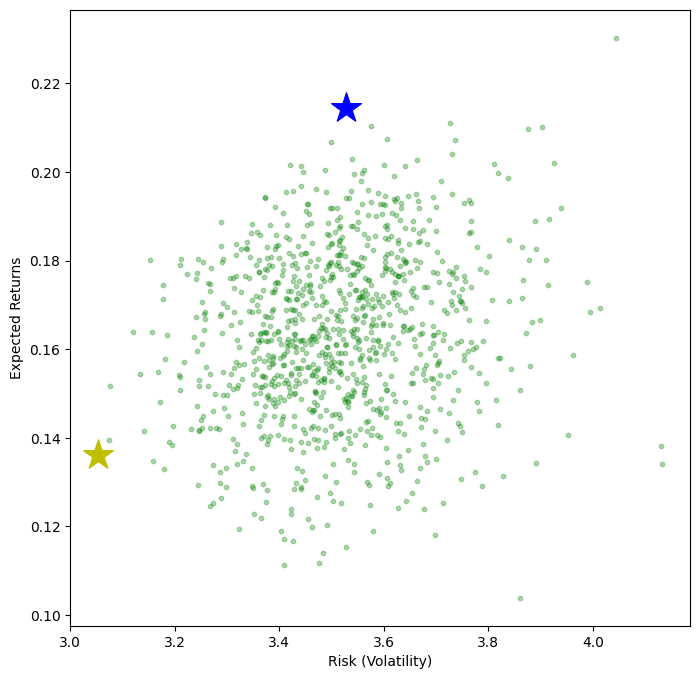

In [ ]:
plt.subplots(figsize=(8,8))
plt.scatter(portfolios_V1['Volatility'], portfolios_V1['Returns'],marker='o', s=10, alpha=0.3, color='green')
plt.scatter(min_vol_port[1], min_vol_port[0], color='y', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='b', marker='*', s=500)
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")

In [ ]:
# To get outputs for multiple weeks

# Change the tickers in the tickers array
# Change the start date and end date so that its a 5 years rolling period
# Also, provide the initial weights (equally weighted) based on number of stocks in the weight_portfolio array